In [1]:
import sys
import os

class NullWriter(object):
    def write(self, arg):
        pass

class DevNull:
    def write(self, msg):
        pass
    
oldstderr = sys.stderr
oldstdout = sys.stdout

sys.path.append('..')
import copy

import cobra
import escher
import pandas as pd
import timeit
import time
#import seaborn

import matplotlib.pyplot as plt
import numpy as np

import cameo

from cameo import fba
from cameo import pfba
#from cameo import moma



from excel_read import read_excel
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

plt.style.use("bmh")

%matplotlib notebook
%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.precision = 10

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: goldenrod' if v else '' for v in is_max]

def highlight_min(s):
    '''
    highlight the minimum in a Series ligthblue.
    '''
    is_min = s == s.min()
    return ['background-color: blue' if v else '' for v in is_min]

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, green otherwise.
    """
    color = 'red' if val < 0 else 'green'
    return 'background-color: %s' % color

In [2]:
match_list = {"Alanine" : "EX_ala(e)",
              "Arginine" : "EX_arg(e)",
              'Asparagine' : "EX_asn(e)",
              'Aspartic Acid' : "EX_asp(e)",
              'Ca pantothenate' : "None",
              'CaCl2' : "None",
              'Cholesterol' : 'EX_clr(e)',
              'Choline chloride' : 'EX_choline(e)',
              'CuSO4' : "None",
              'Cysteine' : 'EX_cys(e)',
              'FeSO4' : "None",
              'Glacial acetic acid' : "None",
              'Glutamate' : 'EX_glu-L(e)', 
              'Glutamine' : 'EX_gln-L(e)',
              'Glycine' : 'EX_gly(e)', 
              'Histidine' : 'EX_his(e)',
              'Inosine' : 'EX_i(e)',
              'Isoleucine' : 'EX_ile(e)',
              'KH2PO4' : "None",
              'Leucine' : 'EX_leu(e)',
              'Lysine' : 'EX_lys(e)',
              'Methionine' : 'EX_met(e)',
              'MgSO4' : "None",
              'MnCl2' : "None",
              'Myo-inositol' : 'EX_ins(e)',
              'NaHCO3' : "None",
              'Nicotinic acid' : "None",
              'Nipagin' : "None",
              'Phenylalanine' : 'EX_phe(e)',
              'Proline' : 'EX_pro(e)',
              'Propionic acid' : "None",
              'Riboflavin' : 'EX_RIBFLV(e)',
              'Serine' : 'EX_ser(e)',
              'Sodium folate' : "None",
              'Sucrose' : 'EX_sucr',
              'Thiamine' : "None",
              'Threonine' : 'EX_thr(e)',
              'Tryptophan' : 'EX_trp(e)',
              'Tyrosine' : 'EX_tyr(e)',
              'Uridine' : 'EX_urd(e)',
              'Valine' : 'EX_val(e)',
              'Water' : "None",
              'ZnSO4' : "None",
              'biotine' : "None",
              'pyridoxine' : "None"}

In [3]:
%time m = cameo.load_model("../FBA_Dmel.xml") #read sbml for cameo #cameo.load_model(

Academic license - for non-commercial use only
Wall time: 221 ms


In [4]:
up_t_EAA = pd.read_csv("../Uptake_Calc/uptake_2xEAA.csv")
up_t_EAA.set_index("Unnamed: 0",inplace=True)

up_t_suc = pd.read_csv("../Uptake_Calc/uptake_2xsuc.csv")
up_t_suc.set_index("Unnamed: 0",inplace=True)

In [5]:
m_loopless = copy.deepcopy(m) #copy the model to prepare a loopless model
print "erstelle loopless model"
cobra.flux_analysis.add_loopless(m_loopless) # convert model in loopless model

m_loopless_2EAA = copy.deepcopy(m_loopless) #copy the model to prepare a loopless model
m_loopless_2sucr = copy.deepcopy(m_loopless) #copy the model to prepare a loopless model

for test in match_list:
    if match_list[test] != "None":
        m_loopless_2sucr.reactions.get_by_id(match_list[test]).lower_bound = -float(up_t_suc.loc[test]["0.122"])
        m_loopless_2EAA.reactions.get_by_id(match_list[test]).lower_bound = -float(up_t_EAA.loc[test]["0.122"])
        
%time fba_result_loopless = fba(m_loopless) #fba result of the loopless model
print "done - loopless FBA"
%time fba_result_loopless_2sucr = fba(m_loopless_2sucr) #fba result of the loopless model
print "done - loopless FBA_2sucr"
%time fba_result_loopless_2EAA = fba(m_loopless_2EAA) #fba result of the loopless model
print "done - loopless FBA_2EAA"

print m_loopless.summary(fva=1)
print m_loopless_2sucr.summary(fva=1)
m_loopless_2EAA.summary(fva=1)

Read LP format model from file c:\users\jurgen\appdata\local\temp\tmpg3kr_d.lp
Reading time = 0.01 seconds
: 293 rows, 726 columns, 2516 nonzeros
Changed value of parameter Method to 0
   Prev: -1  Min: -1  Max: 5  Default: -1
Parameter Method unchanged
   Value: 0  Min: -1  Max: 5  Default: -1
Changed value of parameter Presolve to 0
   Prev: -1  Min: -1  Max: 2  Default: -1
erstelle loopless model
Read LP format model from file c:\users\jurgen\appdata\local\temp\tmpmt_yds.lp
Reading time = 0.02 seconds
: 928 rows, 1922 columns, 10159 nonzeros
Changed value of parameter Method to 0
   Prev: -1  Min: -1  Max: 5  Default: -1
Parameter Method unchanged
   Value: 0  Min: -1  Max: 5  Default: -1
Changed value of parameter Presolve to 0
   Prev: -1  Min: -1  Max: 2  Default: -1
Read LP format model from file c:\users\jurgen\appdata\local\temp\tmpbtg5yj.lp
Reading time = 0.02 seconds
: 928 rows, 1922 columns, 10159 nonzeros
Changed value of parameter Method to 0
   Prev: -1  Min: -1  Max: 5 

In [6]:

HD_2SUCR = fba_result_loopless_2sucr.data_frame["flux"].replace(fba_result_loopless_2sucr.data_frame["flux"]._values,\
                            np.where(fba_result_loopless_2sucr.data_frame["flux"].between(-0.00001,0.00001), 0, fba_result_loopless_2sucr.data_frame["flux"]).tolist())

HD_2EAA = fba_result_loopless_2EAA.data_frame["flux"].replace(fba_result_loopless_2EAA.data_frame["flux"]._values,\
                            np.where(fba_result_loopless_2EAA.data_frame["flux"].between(-0.00001,0.00001), 0, fba_result_loopless_2EAA.data_frame["flux"]).tolist())

HD_standard = fba_result_loopless.data_frame["flux"].replace(fba_result_loopless.data_frame["flux"]._values,\
                            np.where(fba_result_loopless.data_frame["flux"].between(-0.00001,0.00001), 0, fba_result_loopless.data_frame["flux"]).tolist())

flux_diff = [(np.abs(HD_2EAA)-np.abs(HD_standard))/(np.abs(HD_standard))]
flux_diff2 = [(np.abs(HD_2SUCR)-np.abs(HD_standard))/(np.abs(HD_standard))]

In [7]:
flux_diff_filter = pd.DataFrame(flux_diff).T["flux"].replace(np.inf,0).replace(np.nan,0).to_dict()
flux_diff_filter2 = pd.DataFrame(flux_diff2).T["flux"].replace(np.inf,0).replace(np.nan,0).to_dict()

In [ ]:
# Builder = escher.Builder(map_name=None, map_json="../FBA/maps/FlySilico_v1_final.json", model=None, model_name=None, model_json=None, embedded_css=None,
#                reaction_data=flux_diff_filter, metabolite_data=None, gene_data=None, local_host="http://localhost:7778/",
#                         id=None, safe=False)

# Builder.display_in_browser()

In [ ]:

# writer = pd.ExcelWriter('FluxDiff_Foldchange_03092018.xlsx', engine='xlsxwriter')
# df_full = pd.DataFrame(np.array([flux_diff_filter.index,flux_diff_filter.values,flux_diff_filter2.values]).T,columns=["Reaction","HD - HD 2x EAA", "HD - HD 2x Sucr"])
# df_full.to_excel(writer,'FluxDiff')
# writer.save()
# df_full

# writer = pd.ExcelWriter('FlySilico_Fluxes.xlsx', engine='xlsxwriter')
# df_full = pd.DataFrame(np.array([flux_diff_filter.index,HD_standard,HD_2EAA,HD_2SUCR]).T,columns=["Reaction","HD", "HD 2x EAA", "HD 2x Sucr"])
# df_full.to_excel(writer,'Fluxes')
# writer.save()
# df_full

In [120]:
########################
### Flux Diff graphs ###
########################

data_suc = pd.DataFrame(flux_diff2).T["flux"].replace(np.inf,0).replace(np.nan,0)
data_eaa = pd.DataFrame(flux_diff).T["flux"].replace(np.inf,0).replace(np.nan,0)
central_c_meta =sorted(["ACONTa","ACONTb","AKGDm","ATPS4r", "DPNH", "FOC3CO","FUM","G6PDH2r","GND","HEX1","ICDHyr","LDH_L","NTAK","PFK","PGL","PhnN", "PPPH","R1Pk","RPI","SUCD1m","SUCOAS1m","TPI","UFCOR","FBA", "PDH","GAPD","PGK","PGM","ENO","PYK","CS","MDH","PRPPS","PGI"])
suc_meta = sorted(["AF6P","AGA","AMYTRA","PGMT","SGH","UDPGTRA"])
lip_meta = sorted(["ACS3","AGAT","AHD","ALR1","DGA","FASN","GK","GPPA","MGK"])
#sorted(central_c_meta)

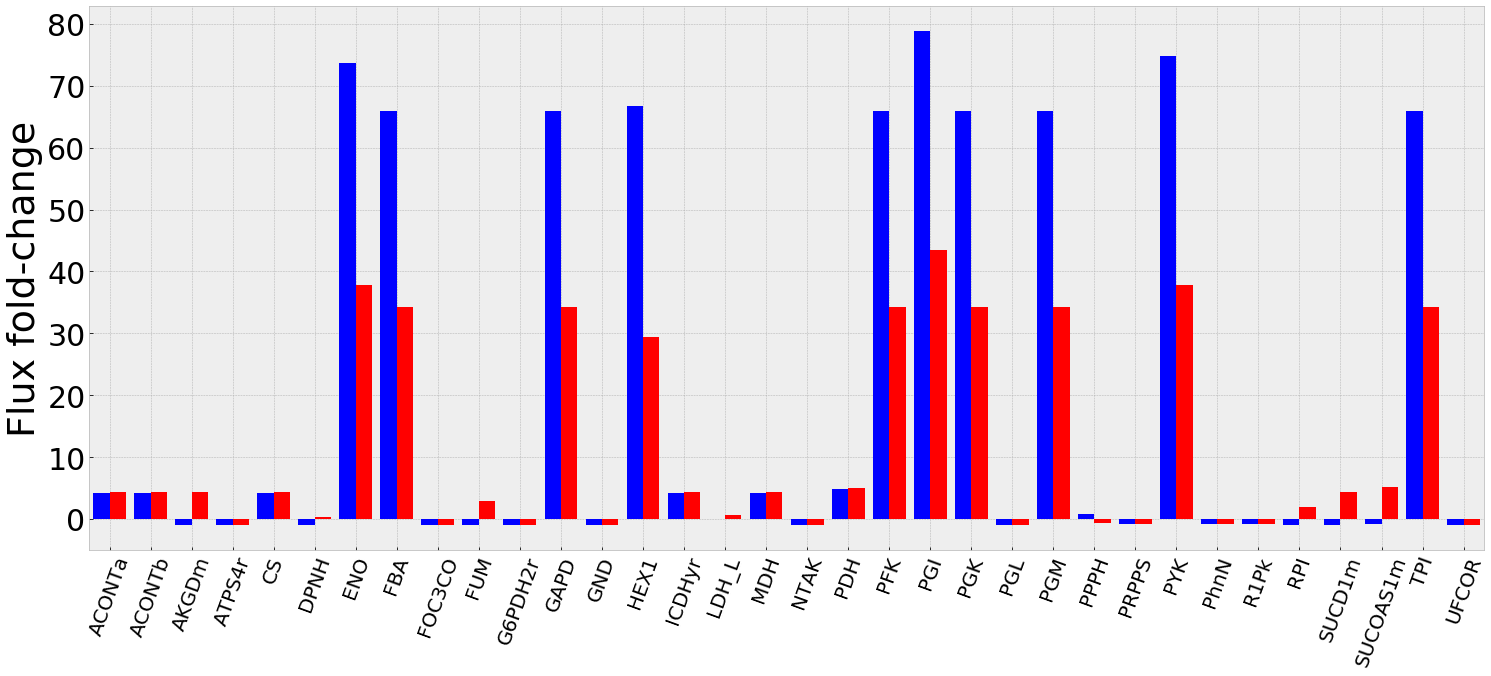

In [125]:
fig, ax = plt.subplots(figsize=(25,10))

data_ind = central_c_meta
y_lab = np.arange(len(data_ind))*2


ax.bar(y_lab-0.4, data_suc.ix[central_c_meta], align='center',
        color="blue",zorder=50)
ax.bar(y_lab+0.4, data_eaa.ix[central_c_meta], align='center',
        color="red",zorder=50)

ax.set_xticks(y_lab)
ax.set_xticklabels(data_ind,rotation=70,size=20)
plt.yticks(size=30)
ax.set_ylabel('Flux fold-change',size=38)
plt.xlim(-1,67)
plt.show()
#fig.savefig("flux_diff_centralcm.png", dpi=100, bbox_inches='tight')

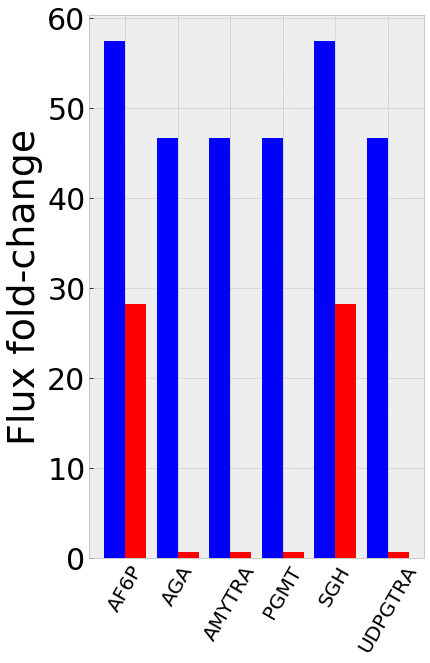

In [131]:
fig, ax = plt.subplots(figsize=(6,10))

data_ind = suc_meta
y_lab = np.arange(len(data_ind))*2


ax.bar(y_lab-0.4, data_suc.ix[suc_meta], align='center',
        color="blue",zorder=50)
ax.bar(y_lab+0.4, data_eaa.ix[suc_meta], align='center',
        color="red",zorder=50)

ax.set_xticks(y_lab)
ax.set_xticklabels(data_ind,rotation=60,size=20)
plt.yticks(size=30)
ax.set_ylabel('Flux fold-change',size=38)

plt.show()
#fig.savefig("flux_diff_sucm.png",dpi=150, bbox_inches='tight')

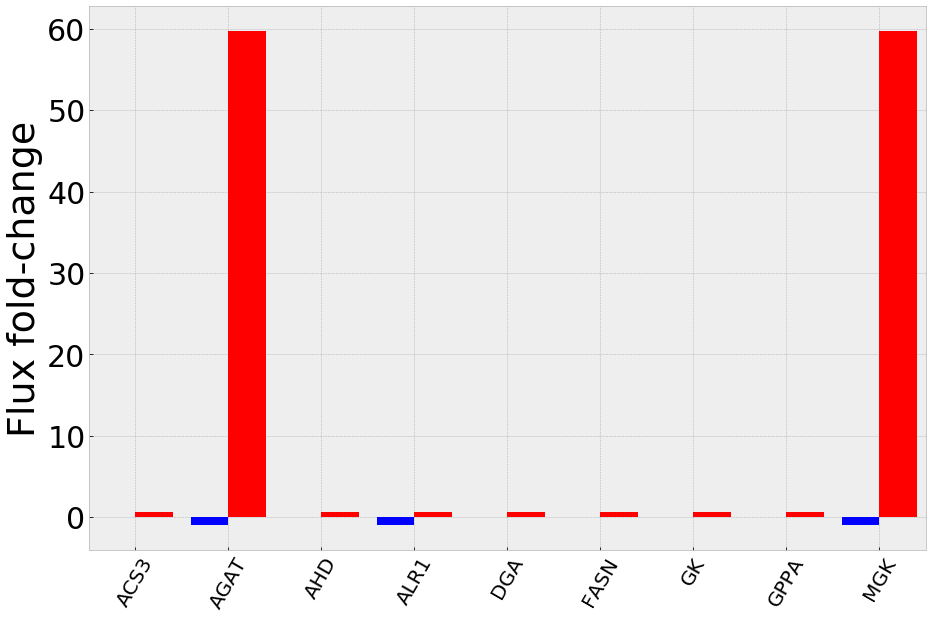

In [140]:
fig, ax = plt.subplots(figsize=(15,10))

data_ind = lip_meta
y_lab = np.arange(len(data_ind))*2


ax.bar(y_lab-0.4, data_suc.ix[ lip_meta], align='center',
        color="blue",zorder=50)
ax.bar(y_lab+0.4, data_eaa.ix[ lip_meta], align='center',
        color="red",zorder=50)

plt.xlim(-1,17)
ax.set_xticks(y_lab)
ax.set_xticklabels(data_ind,rotation=60,size=20)
plt.yticks(size=30)
ax.set_ylabel('Flux fold-change',size=38)

plt.show()
#fig.savefig("flux_diff_lipm.png",dpi=150, bbox_inches='tight')